In [16]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [17]:
from tensorflow.keras import datasets,layers,models

In [18]:
(train_x,train_y),(test_x,test_y)=datasets.mnist.load_data()
train_x,test_x=train_x/255.0,test_x/255.0
train_x=train_x.reshape(train_x.shape[0],28,28,1)
test_x=test_x.reshape(test_x.shape[0],28,28,1)

In [ ]:
model=models.Sequential([
    layers.Conv2D(10,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(25,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(29,activation='relu'),
    layers.Dense(10,activation='softmax')
])

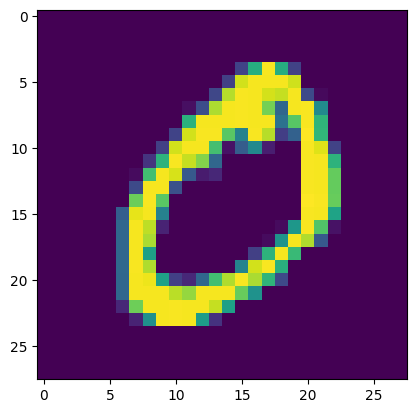

In [20]:
plt.imshow(train_x[1])

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(train_x,train_y,epochs=5,validation_data=(test_x,test_y))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8256 - loss: 0.5342 - val_accuracy: 0.9788 - val_loss: 0.0682
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9750 - loss: 0.0794 - val_accuracy: 0.9820 - val_loss: 0.0565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9834 - loss: 0.0523 - val_accuracy: 0.9877 - val_loss: 0.0382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9869 - loss: 0.0403 - val_accuracy: 0.9859 - val_loss: 0.0429
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9898 - loss: 0.0336 - val_accuracy: 0.9891 - val_loss: 0.0357


In [23]:
model.evaluate(test_x,test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0455


[0.03569689765572548, 0.9890999794006348]

In [24]:
y_test_predict=model.predict(test_x)
y_test_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[2.7331831e-08, 8.7178021e-05, 2.3711912e-04, ..., 9.9885309e-01,
        1.6972160e-06, 3.5466943e-05],
       [1.2151546e-07, 3.0083954e-06, 9.9995136e-01, ..., 3.7161711e-11,
        8.5676652e-07, 2.0372402e-12],
       [7.7271437e-07, 9.9996209e-01, 1.1338875e-05, ..., 1.5040160e-05,
        2.8821917e-06, 1.5225860e-08],
       ...,
       [6.2745151e-14, 5.1702158e-09, 9.3310542e-12, ..., 1.3626230e-07,
        3.0725587e-07, 5.4328922e-08],
       [6.4982356e-07, 7.9597919e-07, 1.4065023e-08, ..., 9.5654007e-10,
        1.6366239e-04, 1.9669831e-06],
       [5.1375457e-07, 7.7217228e-09, 8.6125212e-05, ..., 3.4263553e-10,
        1.0679709e-05, 1.3295478e-08]], dtype=float32)

In [25]:
y_predict=[np.argmax(i) for i in y_test_predict]
y_predict[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

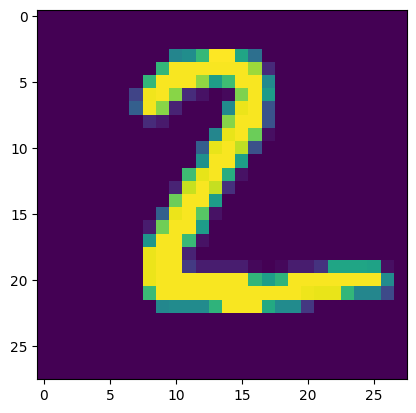

In [26]:
plt.imshow(test_x[1])

In [27]:
np.argmax(y_test_predict[1])

2

In [28]:
cm=confusion_matrix(test_y,y_predict)
cm

array([[ 974,    1,    1,    0,    1,    0,    1,    1,    1,    0],
       [   0, 1132,    0,    2,    0,    0,    1,    0,    0,    0],
       [   0,    2, 1024,    0,    1,    0,    1,    3,    1,    0],
       [   0,    0,    0, 1008,    0,    1,    0,    0,    1,    0],
       [   0,    0,    1,    0,  975,    0,    4,    0,    0,    2],
       [   2,    1,    0,   13,    0,  872,    1,    1,    2,    0],
       [   3,    2,    1,    1,    0,    3,  947,    0,    1,    0],
       [   0,    4,    8,    3,    1,    0,    0, 1011,    0,    1],
       [   1,    0,    4,    0,    0,    0,    2,    1,  962,    4],
       [   1,    2,    0,    2,    6,    4,    0,    3,    5,  986]],
      dtype=int64)

<Axes: >

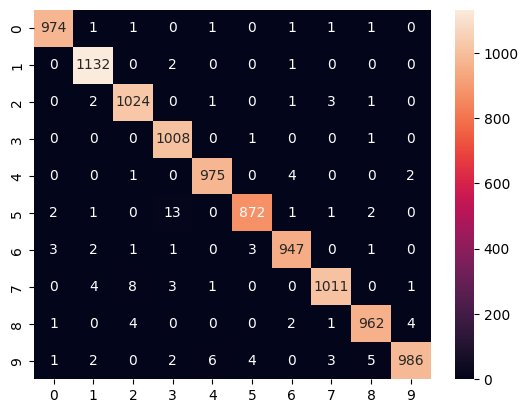

In [30]:
sns.heatmap(cm,annot=True,fmt='d')